In [3]:
# librerias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

In [5]:
#theme
from aquarel import load_theme
theme = load_theme("arctic_dark")
theme.apply()

In [7]:
# carga dataset
file_path = './DATA/issues_history_cleaned_done.csv'
data = pd.read_csv(file_path, encoding='utf-8')
data.head()

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,Created,Team,Transition Date,Initial State,Next State
0,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-08 12:03:40.135000+00:00,To Do,In Progress
1,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-15 21:12:20.786000+00:00,In Progress,Sent to QA
2,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-15 22:51:55.442000+00:00,Sent to QA,In QA
3,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-17 20:52:08.891000+00:00,In QA,In Progress
4,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-22 16:11:29.112000+00:00,Blocked/ On hold,In QA


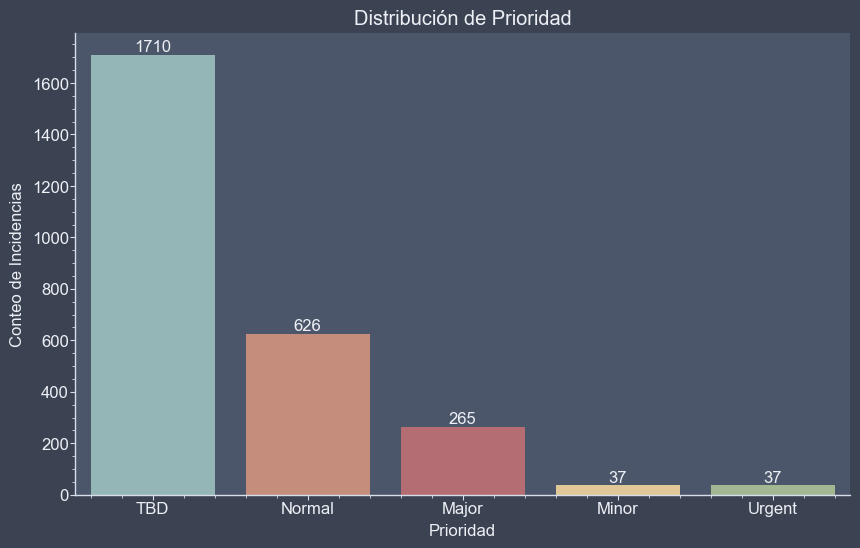

In [9]:
# 1. Distribución de 'Priority'
plt.figure(figsize=(10, 6))

# Crear el gráfico con sns.countplot
ax = sns.countplot(
    data=data, 
    x='Priority', 
    order=data['Priority'].value_counts().index, 
    hue='Priority'
)

# Añadir etiquetas de conteo en cada barra
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

# Personalizar el gráfico
plt.title('Distribución de Prioridad')
plt.xlabel('Prioridad')
plt.ylabel('Conteo de Incidencias')
plt.xticks()
plt.grid(False)
plt.show()

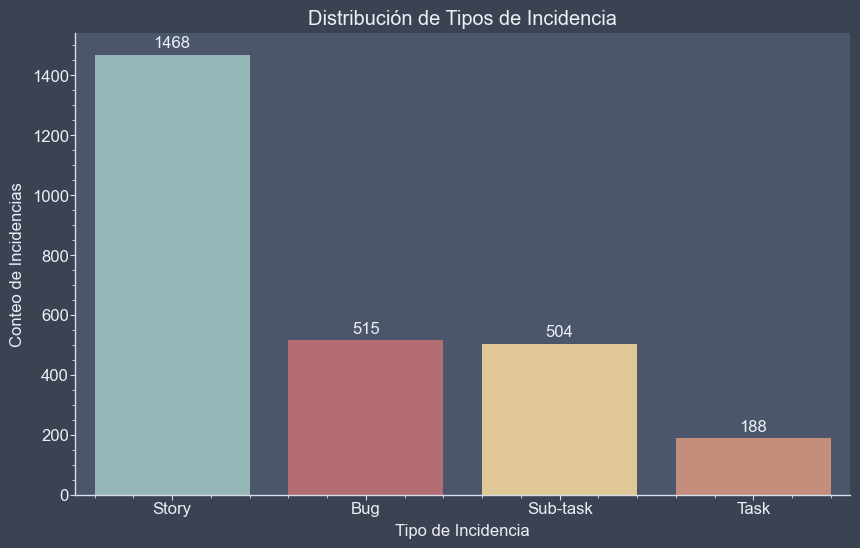

In [11]:
# 2. Distribución de 'Issue Type'
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=data, 
    x='Issue Type', 
    order=data['Issue Type'].value_counts().index, 
    hue='Issue Type'
)

# Añadir etiquetas en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Personalizar el gráfico
plt.title('Distribución de Tipos de Incidencia')
plt.xlabel('Tipo de Incidencia')
plt.ylabel('Conteo de Incidencias')
plt.grid(False)
plt.xticks()
plt.show()

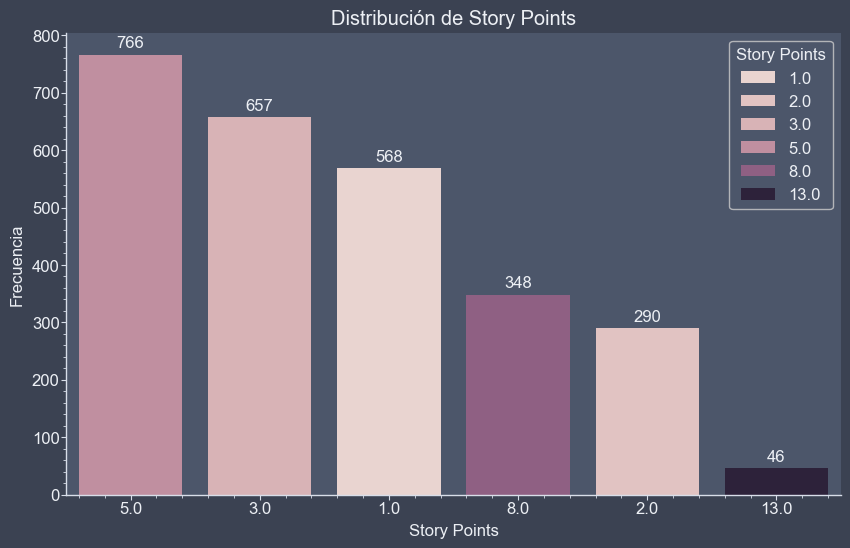

In [13]:
# 3. Distribución de 'Story Points'
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=data, 
    x='Story Points', 
    order=data['Story Points'].value_counts().index, 
    hue='Story Points'
)

# Añadir etiquetas de conteo en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Personalizar el gráfico
plt.title('Distribución de Story Points')
plt.xlabel('Story Points')
plt.ylabel('Frecuencia')
plt.grid(False)
plt.xticks()
plt.show()

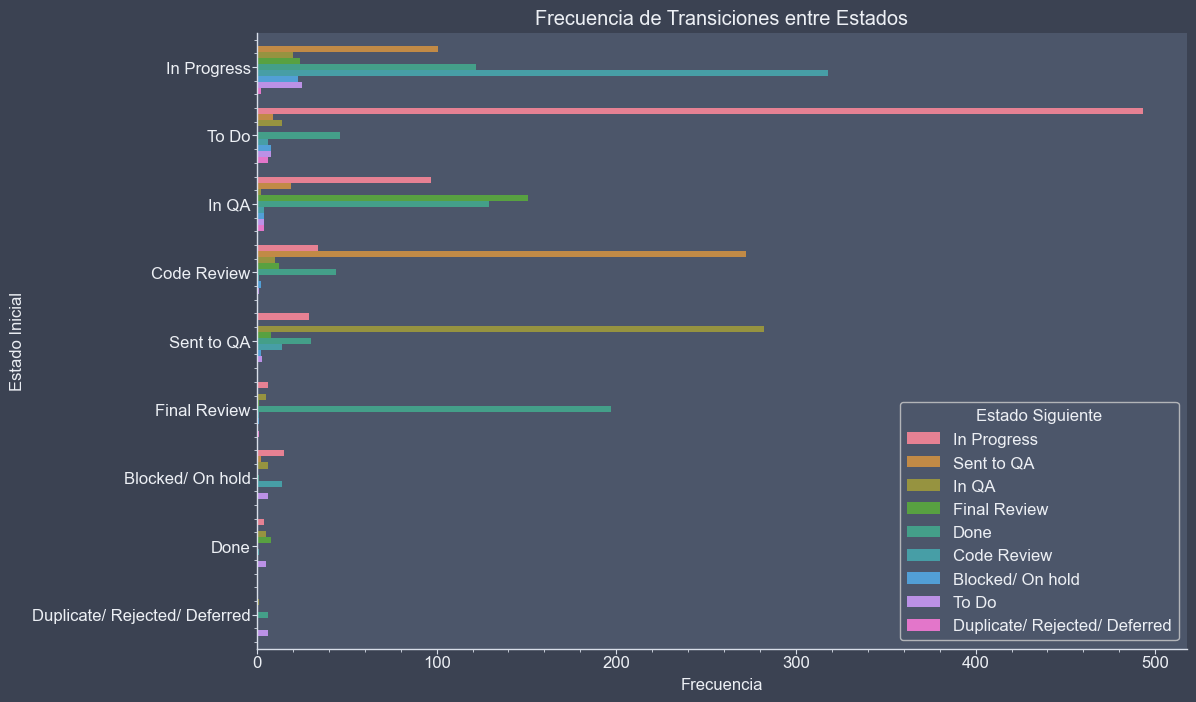

In [15]:
# 4. Gráfico de frecuencia de transiciones entre estados
plt.figure(figsize=(12, 8))
sns.countplot(data=data, y='Initial State', hue='Next State', order=data['Initial State'].value_counts().index)
plt.title('Frecuencia de Transiciones entre Estados')
plt.ylabel('Estado Inicial')
plt.xlabel('Frecuencia')
plt.legend(title='Estado Siguiente')
plt.grid(False)
plt.show()

In [17]:
# 5. Tiempo que pasa una incidencia en cada estado
data['Transition Date'] = pd.to_datetime(data['Transition Date'], errors='coerce')
data['Next Transition Date'] = data.groupby('Key')['Transition Date'].shift(-1)
data['Time in State'] = (data['Next Transition Date'] - data['Transition Date']).dt.total_seconds() / 86400 #dias 

data.head()

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,Created,Team,Transition Date,Initial State,Next State,Next Transition Date,Time in State
0,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-08 12:03:40.135000+00:00,To Do,In Progress,2024-05-15 21:12:20.786000+00:00,7.381026
1,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-15 21:12:20.786000+00:00,In Progress,Sent to QA,2024-05-15 22:51:55.442000+00:00,0.069151
2,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-15 22:51:55.442000+00:00,Sent to QA,In QA,2024-05-17 20:52:08.891000+00:00,1.916822
3,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-17 20:52:08.891000+00:00,In QA,In Progress,2024-05-22 16:11:29.112000+00:00,4.805095
4,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-22 16:11:29.112000+00:00,Blocked/ On hold,In QA,2024-05-23 01:29:42.879000+00:00,0.387659


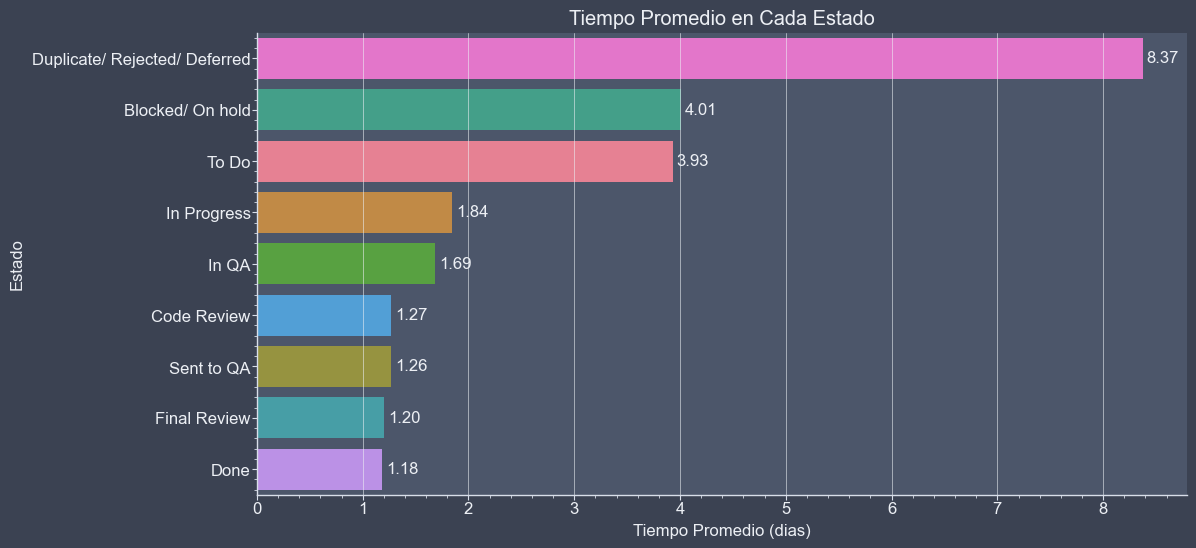

In [19]:
# Tiempo en cada estado
ordered_states = data.groupby('Initial State')['Time in State'].mean().sort_values(ascending=False).index

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=data,
    y='Initial State',
    x='Time in State',
    hue='Initial State',
    errorbar=None,
    order=ordered_states
)

# Añadir etiquetas con el valor en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Personalizar el gráfico
plt.title('Tiempo Promedio en Cada Estado')
plt.ylabel('Estado')
plt.xlabel('Tiempo Promedio (dias)')
plt.xticks()
plt.show()

In [21]:
# 6. Tiempo de resolución de una incidencia
data['Transition Date'] = pd.to_datetime(data['Transition Date'], errors='coerce')
df_resolution_time = data[data['Initial State'] == 'To Do'].copy()


df_resolution_time['Resolution Time'] = (
    data.groupby('Key')['Transition Date'].transform('max') - 
    data.groupby('Key')['Transition Date'].transform('min')
).dt.total_seconds() / 86400   # Convertir a dias

df_resolution_time.head()

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,Created,Team,Transition Date,Initial State,Next State,Next Transition Date,Time in State,Resolution Time
0,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-08 12:03:40.135000+00:00,To Do,In Progress,2024-05-15 21:12:20.786000+00:00,7.381026,15.346312
7,NGP-1036,NGP-1070,TBD,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01.271000+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53.427000+00:00,2024-01-11 19:14:47.652000+00:00,Team Aether,2024-05-29 09:09:00.842000+00:00,To Do,In Progress,2024-06-07 12:04:39.008000+00:00,9.121970,14.541528
16,NGP-1037,NGP-1070,TBD,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01.271000+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53.427000+00:00,2024-01-11 19:15:43.380000+00:00,Team Aether,2024-06-06 11:27:06.793000+00:00,To Do,In Progress,2024-06-06 15:39:33.378000+00:00,0.175308,6.449189
25,NGP-1042,NGP-1449,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 13,2024-07-10 12:28:57+00:00,2024-07-25 06:30:00+00:00,2024-07-24 23:51:39.322000+00:00,2024-01-11 19:21:15.952000+00:00,Team Aether,2024-07-15 12:58:15.110000+00:00,To Do,In Progress,2024-07-16 21:28:12.246000+00:00,1.354134,9.453486
35,NGP-1043,NGP-1449,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37.655000+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47.495000+00:00,2024-01-11 19:22:12.812000+00:00,Team Aether,2024-07-08 15:28:36.316000+00:00,To Do,In Progress,2024-07-10 10:12:17.421000+00:00,1.780337,14.172117


In [23]:
df_resolution_time = df_resolution_time.drop_duplicates(subset='Key', keep='first')

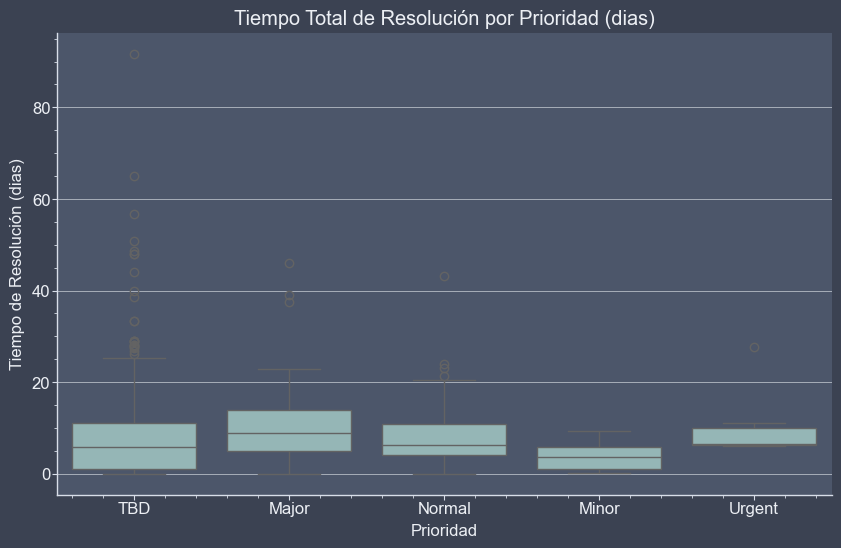

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_resolution_time, x='Priority', y='Resolution Time')
plt.title('Tiempo Total de Resolución por Prioridad (dias)')
plt.xlabel('Prioridad')
plt.ylabel('Tiempo de Resolución (dias)')
plt.xticks()
plt.show()

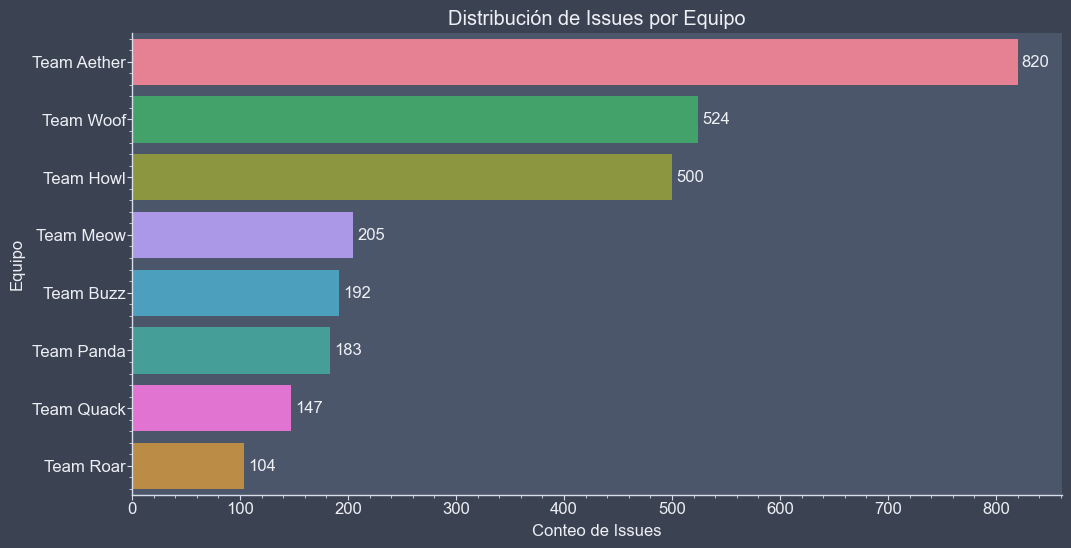

In [27]:
# 7. Distribución de Issues por Equipos
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=data,
    y='Team',
    order=data['Team'].value_counts().index,
    hue='Team'
)

# Añadir etiquetas de conteo en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

# Personalizar el gráfico
plt.title('Distribución de Issues por Equipo')
plt.xlabel('Conteo de Issues')
plt.ylabel('Equipo')
plt.grid(False)
plt.show()

In [29]:
data.head()

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,Created,Team,Transition Date,Initial State,Next State,Next Transition Date,Time in State
0,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-08 12:03:40.135000+00:00,To Do,In Progress,2024-05-15 21:12:20.786000+00:00,7.381026
1,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-15 21:12:20.786000+00:00,In Progress,Sent to QA,2024-05-15 22:51:55.442000+00:00,0.069151
2,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-15 22:51:55.442000+00:00,Sent to QA,In QA,2024-05-17 20:52:08.891000+00:00,1.916822
3,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-17 20:52:08.891000+00:00,In QA,In Progress,2024-05-22 16:11:29.112000+00:00,4.805095
4,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-22 16:11:29.112000+00:00,Blocked/ On hold,In QA,2024-05-23 01:29:42.879000+00:00,0.387659


In [31]:
df_resolution_time = df_resolution_time.set_index('Key')['Resolution Time']
data['Resolution Time'] = data['Key'].map(df_resolution_time)

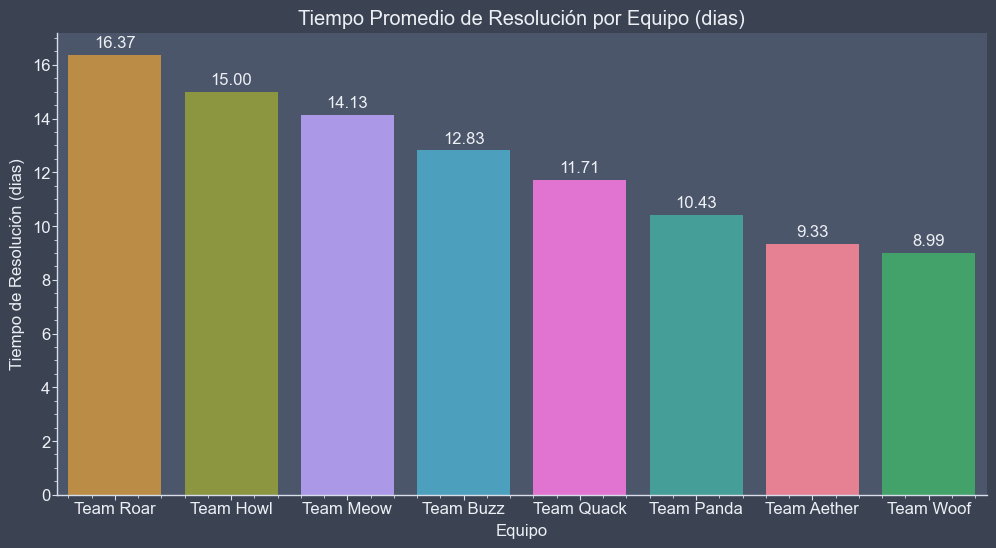

In [33]:
# 8. Visualizar el tiempo promedio de resolución por equipo, Análisis de Productividad por Equipo
plt.figure(figsize=(12, 6))
ordered_teams = data.groupby('Team')['Resolution Time'].mean().sort_values(ascending=False).index

ax = sns.barplot(
    data=data, 
    x='Team', 
    y='Resolution Time', 
    errorbar=None, 
    hue='Team',
    order=ordered_teams
)

# Añadir etiquetas con los valores promedio en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Personalizar el gráfico
plt.title('Tiempo Promedio de Resolución por Equipo (dias)')
plt.xlabel('Equipo')
plt.ylabel('Tiempo de Resolución (dias)')
plt.xticks()
plt.grid(axis='y')
plt.show()

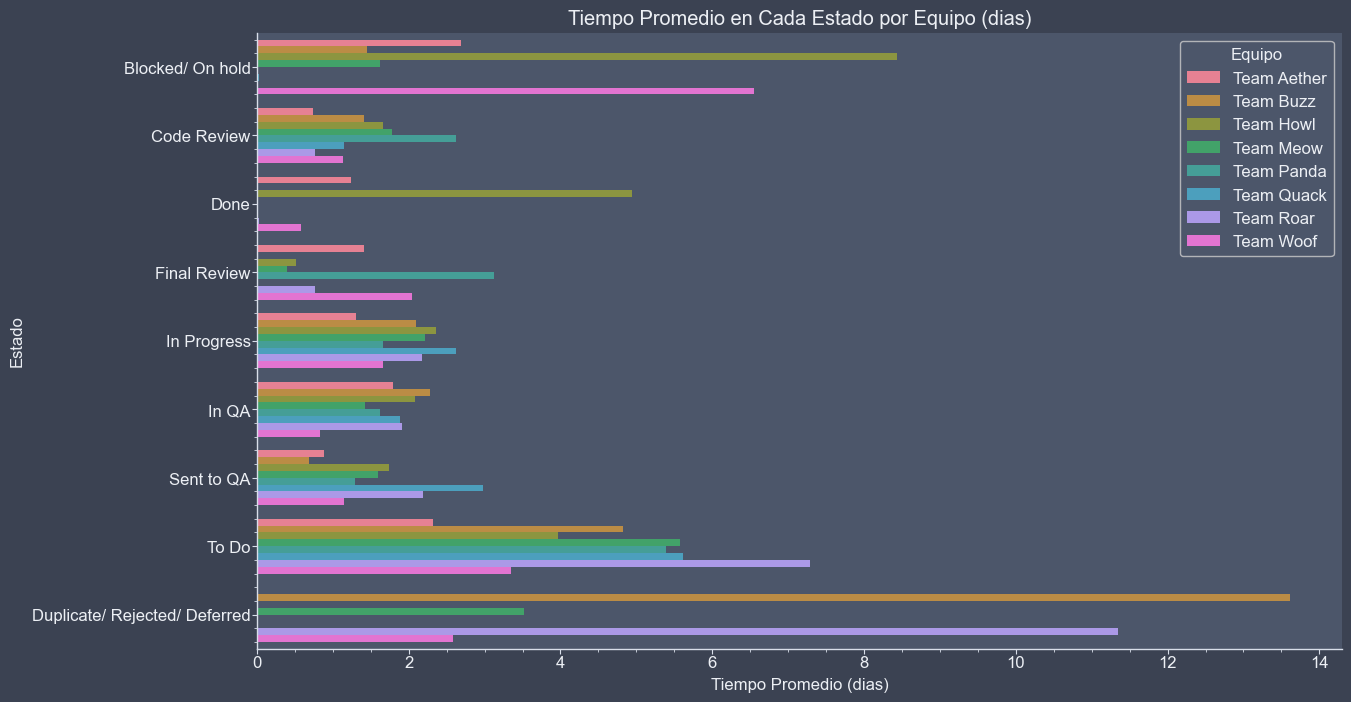

In [35]:
# 9. Tiempo promedio que pasa una incidencia en cada estado por equipo
df_state_time = data.dropna(subset=['Time in State']).groupby(['Team', 'Initial State'])['Time in State'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=df_state_time, y='Initial State', x='Time in State', hue='Team')
plt.title('Tiempo Promedio en Cada Estado por Equipo (dias)')
plt.ylabel('Estado')
plt.xlabel('Tiempo Promedio (dias)')
plt.xticks()
plt.grid(False)
plt.legend(title='Equipo')
plt.show()

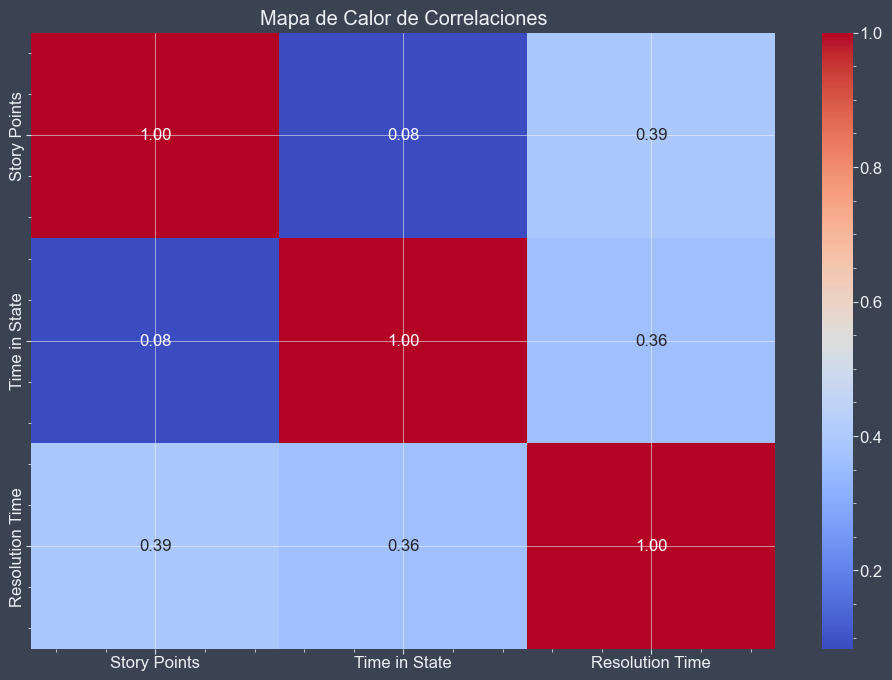

In [37]:
# 10. Análisis de Correlación
# Correlaciones entre variables numéricas como 'Story Points', 'Resolution Time', y 'Time in State'
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

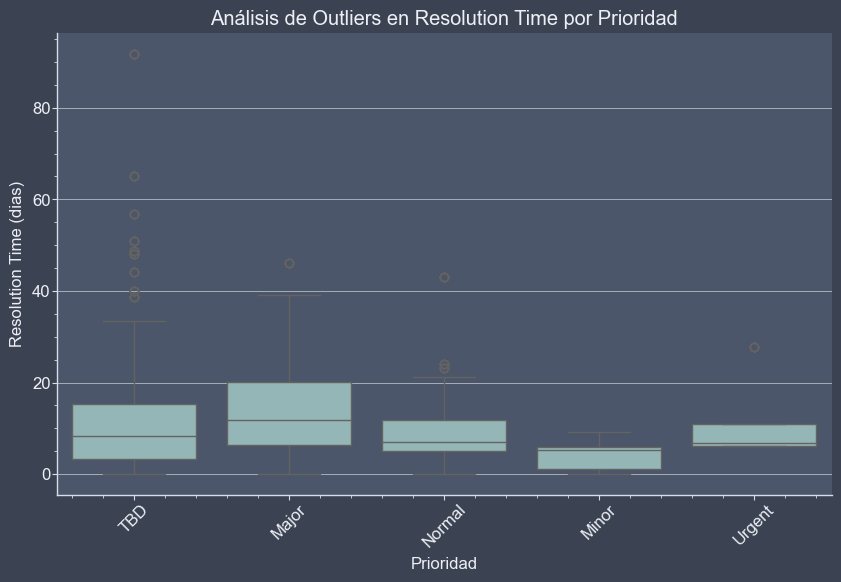

In [39]:
# 11. Identificación de Outliers en 'Resolution Time'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, y='Resolution Time', x='Priority')
plt.title('Análisis de Outliers en Resolution Time por Prioridad')
plt.xlabel('Prioridad')
plt.ylabel('Resolution Time (dias)')
plt.xticks(rotation=45)
plt.show()

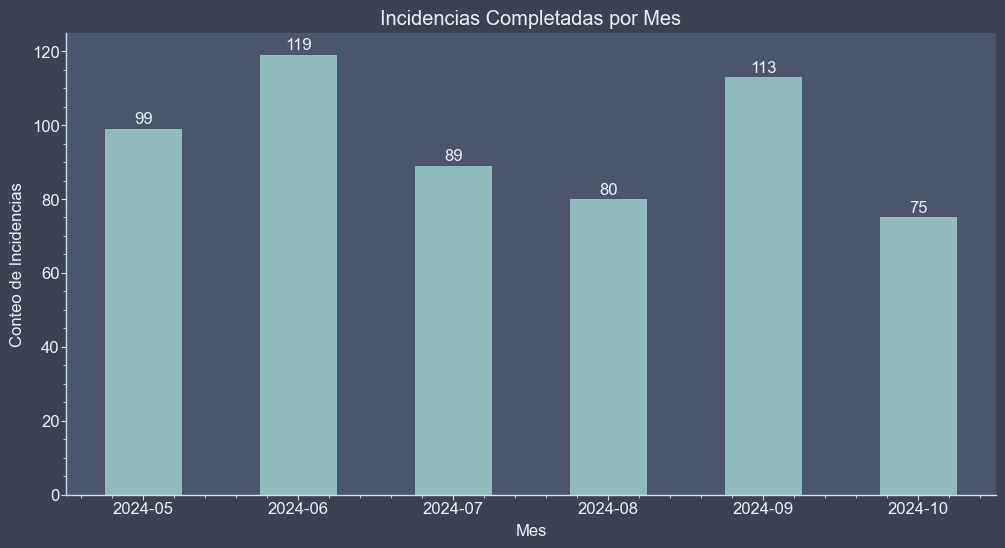

In [41]:
# 12. Análisis Temporal: Incidencias completadas por mes
data_temp = data.copy()
data_temp['Month'] = data['Transition Date'].dt.tz_localize(None).dt.to_period('M')

# Calcular el conteo de incidencias completadas por mes
monthly_counts = data_temp[data_temp['Next State'] == 'Done'].groupby('Month').size()

# Crear el gráfico
plt.figure(figsize=(12, 6))
ax = monthly_counts.plot(kind='bar')
plt.title('Incidencias Completadas por Mes')
plt.xlabel('Mes')
plt.ylabel('Conteo de Incidencias')
plt.xticks(rotation=0)
plt.grid(False)

# Añadir etiquetas encima de cada barra
for i, count in enumerate(monthly_counts):
    ax.text(i, count + 0.5, str(count), ha='center', va='bottom')

plt.show()

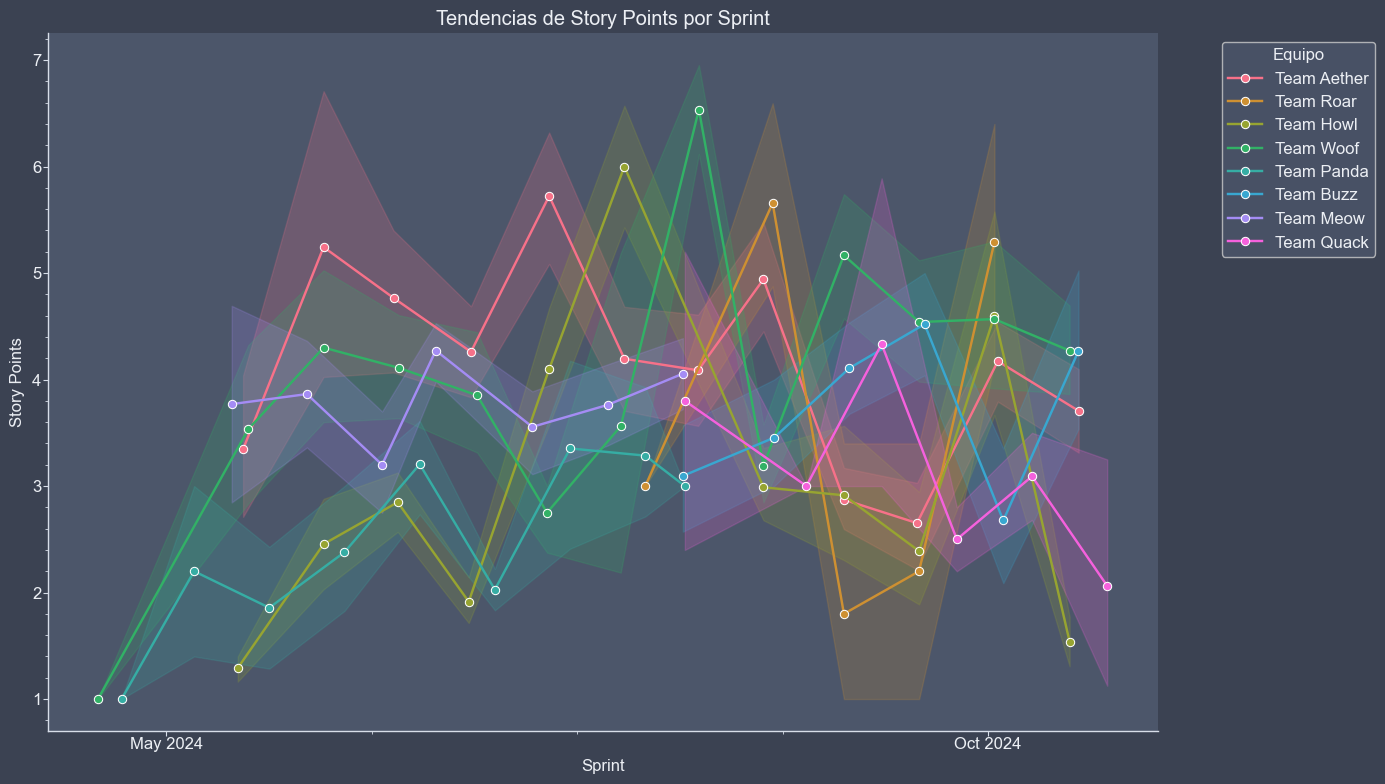

In [43]:
# 13. Análisis de Tendencias de Story Points por Sprint
plt.figure(figsize=(14, 8))

data['Sprint End Date'] = pd.to_datetime(data['Sprint End Date'], format='mixed', errors='coerce')

# Crear el gráfico de líneas utilizando la fecha de inicio del sprint como eje X
ax = sns.lineplot(data=data, x='Sprint End Date', y='Story Points', hue='Team', marker='o')
plt.title('Tendencias de Story Points por Sprint')
plt.ylabel('Story Points')
plt.xlabel('Sprint')

# Eliminar las líneas de cuadrícula del gráfico
plt.grid(False)

# Truncar las fechas solo visualmente en el eje X (mostrar solo mes y año)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Personalizar la leyenda
plt.xticks()
ax.set_xticks(ax.get_xticks()[::5])

# Ajustar la leyenda
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [45]:
output_csv_path = './DATA/issues_history_final_eda.csv'
data.to_csv(output_csv_path, index=False)

output_csv_path

'./DATA/issues_history_final_eda.csv'

# Feature engineering

In [48]:
file_path = './DATA/issues_history_final_eda.csv'
data = pd.read_csv(file_path, encoding='utf-8')
data.head()

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,Created,Team,Transition Date,Initial State,Next State,Next Transition Date,Time in State,Resolution Time
0,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-08 12:03:40.135000+00:00,To Do,In Progress,2024-05-15 21:12:20.786000+00:00,7.381026,15.346312
1,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-15 21:12:20.786000+00:00,In Progress,Sent to QA,2024-05-15 22:51:55.442000+00:00,0.069151,15.346312
2,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-15 22:51:55.442000+00:00,Sent to QA,In QA,2024-05-17 20:52:08.891000+00:00,1.916822,15.346312
3,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-17 20:52:08.891000+00:00,In QA,In Progress,2024-05-22 16:11:29.112000+00:00,4.805095,15.346312
4,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-22 16:11:29.112000+00:00,Blocked/ On hold,In QA,2024-05-23 01:29:42.879000+00:00,0.387659,15.346312


In [50]:
data['Blocked'] = data['Initial State'].apply(lambda x: 1 if 'Blocked/ On hold' in x else 0)
data['Blocked'] = data.groupby('Key')['Blocked'].transform('max')
data.head()

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,Created,Team,Transition Date,Initial State,Next State,Next Transition Date,Time in State,Resolution Time,Blocked
0,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-08 12:03:40.135000+00:00,To Do,In Progress,2024-05-15 21:12:20.786000+00:00,7.381026,15.346312,1
1,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-15 21:12:20.786000+00:00,In Progress,Sent to QA,2024-05-15 22:51:55.442000+00:00,0.069151,15.346312,1
2,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-15 22:51:55.442000+00:00,Sent to QA,In QA,2024-05-17 20:52:08.891000+00:00,1.916822,15.346312,1
3,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-17 20:52:08.891000+00:00,In QA,In Progress,2024-05-22 16:11:29.112000+00:00,4.805095,15.346312,1
4,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-22 16:11:29.112000+00:00,Blocked/ On hold,In QA,2024-05-23 01:29:42.879000+00:00,0.387659,15.346312,1


In [52]:
data = data.drop_duplicates(subset='Key', keep='first').copy()
data

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,Created,Team,Transition Date,Initial State,Next State,Next Transition Date,Time in State,Resolution Time,Blocked
0,NGP-1035,NGP-1025,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-08 12:03:40.135000+00:00,To Do,In Progress,2024-05-15 21:12:20.786000+00:00,7.381026,15.346312,1
7,NGP-1036,NGP-1070,TBD,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01.271000+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53.427000+00:00,2024-01-11 19:14:47.652000+00:00,Team Aether,2024-05-29 09:09:00.842000+00:00,To Do,In Progress,2024-06-07 12:04:39.008000+00:00,9.121970,14.541528,0
16,NGP-1037,NGP-1070,TBD,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01.271000+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53.427000+00:00,2024-01-11 19:15:43.380000+00:00,Team Aether,2024-06-06 11:27:06.793000+00:00,To Do,In Progress,2024-06-06 15:39:33.378000+00:00,0.175308,6.449189,0
25,NGP-1042,NGP-1449,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 13,2024-07-10 12:28:57+00:00,2024-07-25 06:30:00+00:00,2024-07-24 23:51:39.322000+00:00,2024-01-11 19:21:15.952000+00:00,Team Aether,2024-07-15 12:58:15.110000+00:00,To Do,In Progress,2024-07-16 21:28:12.246000+00:00,1.354134,9.453486,1
35,NGP-1043,NGP-1449,TBD,5.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37.655000+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47.495000+00:00,2024-01-11 19:22:12.812000+00:00,Team Aether,2024-07-08 15:28:36.316000+00:00,To Do,In Progress,2024-07-10 10:12:17.421000+00:00,1.780337,14.172117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,NGP-908,NGP-1449,TBD,8.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37.655000+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47.495000+00:00,2023-12-22 15:28:48.550000+00:00,Team Aether,2024-07-03 19:34:58.110000+00:00,To Do,In Progress,2024-07-03 20:08:34.696000+00:00,0.023340,12.655418,0
2639,NGP-909,NGP-1025,TBD,3.0,Juan.hernandez,Story,Team Aether Sprint 8,2024-05-01 07:00:48.198000+00:00,2024-05-15 07:00:00+00:00,2024-05-15 12:16:44.265000+00:00,2023-12-22 15:29:34.843000+00:00,Team Aether,2024-05-02 14:56:06.519000+00:00,To Do,In Progress,2024-05-02 14:56:37.178000+00:00,0.000355,12.879990,1
2648,NGP-911,NGP-1070,TBD,8.0,Juan.hernandez,Story,Team Aether Sprint 11,2024-06-13 07:00:00+00:00,2024-06-26 17:05:00+00:00,2024-06-26 21:11:54.961000+00:00,2023-12-22 15:31:54.756000+00:00,Team Aether,2024-06-11 11:56:49.589000+00:00,To Do,In Progress,2024-06-14 17:00:08.260000+00:00,3.210633,13.238011,0
2657,NGP-916,NGP-1449,TBD,8.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37.655000+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47.495000+00:00,2023-12-22 15:51:37.057000+00:00,Team Aether,2024-07-08 13:43:35.731000+00:00,To Do,In Progress,2024-07-10 22:00:37.759000+00:00,2.345162,9.392539,0


In [54]:
# Estandarizacion 
priority_map = {
    'TBD': 'Low',
    'Minor': 'Low',
    'Normal': 'Medium',
    'Major': 'High',
    'Urgent': 'High'
}
data['Priority'] = data['Priority'].map(priority_map)
data

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,Created,Team,Transition Date,Initial State,Next State,Next Transition Date,Time in State,Resolution Time,Blocked
0,NGP-1035,NGP-1025,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-08 12:03:40.135000+00:00,To Do,In Progress,2024-05-15 21:12:20.786000+00:00,7.381026,15.346312,1
7,NGP-1036,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01.271000+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53.427000+00:00,2024-01-11 19:14:47.652000+00:00,Team Aether,2024-05-29 09:09:00.842000+00:00,To Do,In Progress,2024-06-07 12:04:39.008000+00:00,9.121970,14.541528,0
16,NGP-1037,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01.271000+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53.427000+00:00,2024-01-11 19:15:43.380000+00:00,Team Aether,2024-06-06 11:27:06.793000+00:00,To Do,In Progress,2024-06-06 15:39:33.378000+00:00,0.175308,6.449189,0
25,NGP-1042,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 13,2024-07-10 12:28:57+00:00,2024-07-25 06:30:00+00:00,2024-07-24 23:51:39.322000+00:00,2024-01-11 19:21:15.952000+00:00,Team Aether,2024-07-15 12:58:15.110000+00:00,To Do,In Progress,2024-07-16 21:28:12.246000+00:00,1.354134,9.453486,1
35,NGP-1043,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37.655000+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47.495000+00:00,2024-01-11 19:22:12.812000+00:00,Team Aether,2024-07-08 15:28:36.316000+00:00,To Do,In Progress,2024-07-10 10:12:17.421000+00:00,1.780337,14.172117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,NGP-908,NGP-1449,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37.655000+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47.495000+00:00,2023-12-22 15:28:48.550000+00:00,Team Aether,2024-07-03 19:34:58.110000+00:00,To Do,In Progress,2024-07-03 20:08:34.696000+00:00,0.023340,12.655418,0
2639,NGP-909,NGP-1025,Low,3.0,Juan.hernandez,Story,Team Aether Sprint 8,2024-05-01 07:00:48.198000+00:00,2024-05-15 07:00:00+00:00,2024-05-15 12:16:44.265000+00:00,2023-12-22 15:29:34.843000+00:00,Team Aether,2024-05-02 14:56:06.519000+00:00,To Do,In Progress,2024-05-02 14:56:37.178000+00:00,0.000355,12.879990,1
2648,NGP-911,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 11,2024-06-13 07:00:00+00:00,2024-06-26 17:05:00+00:00,2024-06-26 21:11:54.961000+00:00,2023-12-22 15:31:54.756000+00:00,Team Aether,2024-06-11 11:56:49.589000+00:00,To Do,In Progress,2024-06-14 17:00:08.260000+00:00,3.210633,13.238011,0
2657,NGP-916,NGP-1449,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37.655000+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47.495000+00:00,2023-12-22 15:51:37.057000+00:00,Team Aether,2024-07-08 13:43:35.731000+00:00,To Do,In Progress,2024-07-10 22:00:37.759000+00:00,2.345162,9.392539,0


In [56]:
# Calculo eficiencia del responsable de la incidencia
data['Member Efficiency per ticket'] = np.where(data['Resolution Time'] > 0, data['Story Points'] / data['Resolution Time'], 0)
data.head()

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,Created,Team,Transition Date,Initial State,Next State,Next Transition Date,Time in State,Resolution Time,Blocked,Member Efficiency per ticket
0,NGP-1035,NGP-1025,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45.960000+00:00,2024-01-11 19:13:48.113000+00:00,Team Aether,2024-05-08 12:03:40.135000+00:00,To Do,In Progress,2024-05-15 21:12:20.786000+00:00,7.381026,15.346312,1,0.325811
7,NGP-1036,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01.271000+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53.427000+00:00,2024-01-11 19:14:47.652000+00:00,Team Aether,2024-05-29 09:09:00.842000+00:00,To Do,In Progress,2024-06-07 12:04:39.008000+00:00,9.121970,14.541528,0,0.550149
16,NGP-1037,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01.271000+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53.427000+00:00,2024-01-11 19:15:43.380000+00:00,Team Aether,2024-06-06 11:27:06.793000+00:00,To Do,In Progress,2024-06-06 15:39:33.378000+00:00,0.175308,6.449189,0,1.240466
25,NGP-1042,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 13,2024-07-10 12:28:57+00:00,2024-07-25 06:30:00+00:00,2024-07-24 23:51:39.322000+00:00,2024-01-11 19:21:15.952000+00:00,Team Aether,2024-07-15 12:58:15.110000+00:00,To Do,In Progress,2024-07-16 21:28:12.246000+00:00,1.354134,9.453486,1,0.528905
35,NGP-1043,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37.655000+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47.495000+00:00,2024-01-11 19:22:12.812000+00:00,Team Aether,2024-07-08 15:28:36.316000+00:00,To Do,In Progress,2024-07-10 10:12:17.421000+00:00,1.780337,14.172117,1,0.352805


In [58]:
# convert datatime
data['Sprint Start Date'] = data['Sprint Start Date'].str.split('.').str[0] + '+00:00'
data['Sprint End Date'] = data['Sprint End Date'].str.split('.').str[0] + '+00:00'
data['Sprint Complete Date'] = data['Sprint Complete Date'].str.split('.').str[0] + '+00:00'

data['Sprint Start Date'] = pd.to_datetime(data['Sprint Start Date'], errors='coerce')
data['Sprint End Date'] = pd.to_datetime(data['Sprint End Date'], errors='coerce')
data['Sprint Complete Date'] = pd.to_datetime(data['Sprint Complete Date'], errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_16608\2228969476.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Sprint Start Date'] = pd.to_datetime(data['Sprint Start Date'], errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_16608\2228969476.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Sprint End Date'] = pd.to_datetime(data['Sprint End Date'], errors='coerce')


In [60]:
# Calcular si el sprint se pasó de la fecha programada
data['Sprint Overdue'] = (data['Sprint Complete Date'] > data['Sprint End Date']).astype(int)

In [62]:
# Días restantes en el sprint al momento de completar una incidencia
data['Days to Sprint End'] = (data['Sprint End Date'] - data['Sprint Complete Date']).dt.days

In [64]:
# Categorización de 'Story Points'

# Definir los bins para las categorías de complejidad
bins = [0, 3, 5, 21]  # Los límites incluyen el valor más bajo y el más alto de cada rango
labels = ['Low', 'Medium', 'High']

# Categorizar 'Story Points' usando cut de pandas
data['Complexity'] = pd.cut(data['Story Points'], bins=bins, labels=labels, right=True, include_lowest=True)

# Verificar las categorías asignadas
data.head()

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,...,Initial State,Next State,Next Transition Date,Time in State,Resolution Time,Blocked,Member Efficiency per ticket,Sprint Overdue,Days to Sprint End,Complexity
0,NGP-1035,NGP-1025,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45+00:00,...,To Do,In Progress,2024-05-15 21:12:20.786000+00:00,7.381026,15.346312,1,0.325811,1,-1,Medium
7,NGP-1036,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,To Do,In Progress,2024-06-07 12:04:39.008000+00:00,9.121970,14.541528,0,0.550149,1,-1,High
16,NGP-1037,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,To Do,In Progress,2024-06-06 15:39:33.378000+00:00,0.175308,6.449189,0,1.240466,1,-1,High
25,NGP-1042,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 13,2024-07-10 12:28:57+00:00,2024-07-25 06:30:00+00:00,2024-07-24 23:51:39+00:00,...,To Do,In Progress,2024-07-16 21:28:12.246000+00:00,1.354134,9.453486,1,0.528905,0,0,Medium
35,NGP-1043,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47+00:00,...,To Do,In Progress,2024-07-10 10:12:17.421000+00:00,1.780337,14.172117,1,0.352805,0,0,Medium


In [66]:
# Suma de story points por equipo y sprint
data['Total Story Points per Sprint and team'] = data.groupby(['Team', 'Sprint'])['Story Points'].transform('sum')
data.head()

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,...,Next State,Next Transition Date,Time in State,Resolution Time,Blocked,Member Efficiency per ticket,Sprint Overdue,Days to Sprint End,Complexity,Total Story Points per Sprint and team
0,NGP-1035,NGP-1025,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45+00:00,...,In Progress,2024-05-15 21:12:20.786000+00:00,7.381026,15.346312,1,0.325811,1,-1,Medium,37.0
7,NGP-1036,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,In Progress,2024-06-07 12:04:39.008000+00:00,9.121970,14.541528,0,0.550149,1,-1,High,45.0
16,NGP-1037,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,In Progress,2024-06-06 15:39:33.378000+00:00,0.175308,6.449189,0,1.240466,1,-1,High,45.0
25,NGP-1042,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 13,2024-07-10 12:28:57+00:00,2024-07-25 06:30:00+00:00,2024-07-24 23:51:39+00:00,...,In Progress,2024-07-16 21:28:12.246000+00:00,1.354134,9.453486,1,0.528905,0,0,Medium,29.0
35,NGP-1043,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47+00:00,...,In Progress,2024-07-10 10:12:17.421000+00:00,1.780337,14.172117,1,0.352805,0,0,Medium,91.0


In [68]:
# Suma de story points por miembro del equipo y sprint
data['Total Story Points per Member per Sprint'] = data.groupby(['Assignee', 'Sprint'])['Story Points'].transform('sum')
data.head()

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,...,Next Transition Date,Time in State,Resolution Time,Blocked,Member Efficiency per ticket,Sprint Overdue,Days to Sprint End,Complexity,Total Story Points per Sprint and team,Total Story Points per Member per Sprint
0,NGP-1035,NGP-1025,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45+00:00,...,2024-05-15 21:12:20.786000+00:00,7.381026,15.346312,1,0.325811,1,-1,Medium,37.0,23.0
7,NGP-1036,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,2024-06-07 12:04:39.008000+00:00,9.121970,14.541528,0,0.550149,1,-1,High,45.0,31.0
16,NGP-1037,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,2024-06-06 15:39:33.378000+00:00,0.175308,6.449189,0,1.240466,1,-1,High,45.0,31.0
25,NGP-1042,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 13,2024-07-10 12:28:57+00:00,2024-07-25 06:30:00+00:00,2024-07-24 23:51:39+00:00,...,2024-07-16 21:28:12.246000+00:00,1.354134,9.453486,1,0.528905,0,0,Medium,29.0,13.0
35,NGP-1043,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47+00:00,...,2024-07-10 10:12:17.421000+00:00,1.780337,14.172117,1,0.352805,0,0,Medium,91.0,67.0


In [70]:
# Calculando la eficiencia media del equipo por sprint
data['Average Team Efficiency per Sprint'] = data.groupby(['Team', 'Sprint'])['Member Efficiency per ticket'].transform('mean')
data.head()

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,...,Time in State,Resolution Time,Blocked,Member Efficiency per ticket,Sprint Overdue,Days to Sprint End,Complexity,Total Story Points per Sprint and team,Total Story Points per Member per Sprint,Average Team Efficiency per Sprint
0,NGP-1035,NGP-1025,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45+00:00,...,7.381026,15.346312,1,0.325811,1,-1,Medium,37.0,23.0,3.188384
7,NGP-1036,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,9.121970,14.541528,0,0.550149,1,-1,High,45.0,31.0,241.602579
16,NGP-1037,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,0.175308,6.449189,0,1.240466,1,-1,High,45.0,31.0,241.602579
25,NGP-1042,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 13,2024-07-10 12:28:57+00:00,2024-07-25 06:30:00+00:00,2024-07-24 23:51:39+00:00,...,1.354134,9.453486,1,0.528905,0,0,Medium,29.0,13.0,3.471477
35,NGP-1043,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47+00:00,...,1.780337,14.172117,1,0.352805,0,0,Medium,91.0,67.0,317.951894


In [72]:
# Calculando tasas de bloqueo por tipo de incidencia y sprint
data['Block Rate by Issue Type'] = data.groupby(['Issue Type', 'Sprint'])['Blocked'].transform('mean')
data.head()

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,...,Resolution Time,Blocked,Member Efficiency per ticket,Sprint Overdue,Days to Sprint End,Complexity,Total Story Points per Sprint and team,Total Story Points per Member per Sprint,Average Team Efficiency per Sprint,Block Rate by Issue Type
0,NGP-1035,NGP-1025,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45+00:00,...,15.346312,1,0.325811,1,-1,Medium,37.0,23.0,3.188384,0.500000
7,NGP-1036,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,14.541528,0,0.550149,1,-1,High,45.0,31.0,241.602579,0.000000
16,NGP-1037,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,6.449189,0,1.240466,1,-1,High,45.0,31.0,241.602579,0.000000
25,NGP-1042,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 13,2024-07-10 12:28:57+00:00,2024-07-25 06:30:00+00:00,2024-07-24 23:51:39+00:00,...,9.453486,1,0.528905,0,0,Medium,29.0,13.0,3.471477,0.333333
35,NGP-1043,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47+00:00,...,14.172117,1,0.352805,0,0,Medium,91.0,67.0,317.951894,0.444444


In [74]:
data

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,...,Resolution Time,Blocked,Member Efficiency per ticket,Sprint Overdue,Days to Sprint End,Complexity,Total Story Points per Sprint and team,Total Story Points per Member per Sprint,Average Team Efficiency per Sprint,Block Rate by Issue Type
0,NGP-1035,NGP-1025,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45+00:00,...,15.346312,1,0.325811,1,-1,Medium,37.0,23.0,3.188384,0.500000
7,NGP-1036,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,14.541528,0,0.550149,1,-1,High,45.0,31.0,241.602579,0.000000
16,NGP-1037,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,6.449189,0,1.240466,1,-1,High,45.0,31.0,241.602579,0.000000
25,NGP-1042,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 13,2024-07-10 12:28:57+00:00,2024-07-25 06:30:00+00:00,2024-07-24 23:51:39+00:00,...,9.453486,1,0.528905,0,0,Medium,29.0,13.0,3.471477,0.333333
35,NGP-1043,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47+00:00,...,14.172117,1,0.352805,0,0,Medium,91.0,67.0,317.951894,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,NGP-908,NGP-1449,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47+00:00,...,12.655418,0,0.632140,0,0,High,91.0,67.0,317.951894,0.444444
2639,NGP-909,NGP-1025,Low,3.0,Juan.hernandez,Story,Team Aether Sprint 8,2024-05-01 07:00:48+00:00,2024-05-15 07:00:00+00:00,2024-05-15 12:16:44+00:00,...,12.879990,1,0.232919,1,-1,Low,28.0,14.0,3.295260,0.666667
2648,NGP-911,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 11,2024-06-13 07:00:00+00:00,2024-06-26 17:05:00+00:00,2024-06-26 21:11:54+00:00,...,13.238011,0,0.604320,1,-1,High,56.0,28.0,2.345269,0.000000
2657,NGP-916,NGP-1449,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47+00:00,...,9.392539,0,0.851740,0,0,High,91.0,67.0,317.951894,0.444444


In [76]:
def estimate_accuracy(row):
    points = row['Story Points']
    resolution_time_days = row['Resolution Time']  # Asegurarse de que está en días
    resolution_time_hours = resolution_time_days * 24  # Convertir días en horas para mayor precisión

    if (points == 1 and resolution_time_hours <= 12) or \
       (points == 2 and 12 < resolution_time_hours <= 36) or \
       (points == 3 and 36 < resolution_time_hours <= 72) or \
       (points == 5 and 72 < resolution_time_hours <= 96) or \
       (points == 8 and 96 < resolution_time_hours <= 168) or \
       (points == 13 and resolution_time_hours > 168):
        return 1
    else:
        return 0

# Aplica la función para crear la nueva columna
data['Estimation Accurate'] = data.apply(estimate_accuracy, axis=1)
data

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Sprint Start Date,Sprint End Date,Sprint Complete Date,...,Blocked,Member Efficiency per ticket,Sprint Overdue,Days to Sprint End,Complexity,Total Story Points per Sprint and team,Total Story Points per Member per Sprint,Average Team Efficiency per Sprint,Block Rate by Issue Type,Estimation Accurate
0,NGP-1035,NGP-1025,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 9,2024-05-16 07:00:00+00:00,2024-05-30 06:30:00+00:00,2024-05-30 12:39:45+00:00,...,1,0.325811,1,-1,Medium,37.0,23.0,3.188384,0.500000,0
7,NGP-1036,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,0,0.550149,1,-1,High,45.0,31.0,241.602579,0.000000,0
16,NGP-1037,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,2024-05-30 12:39:01+00:00,2024-06-12 07:00:00+00:00,2024-06-12 22:44:53+00:00,...,0,1.240466,1,-1,High,45.0,31.0,241.602579,0.000000,1
25,NGP-1042,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 13,2024-07-10 12:28:57+00:00,2024-07-25 06:30:00+00:00,2024-07-24 23:51:39+00:00,...,1,0.528905,0,0,Medium,29.0,13.0,3.471477,0.333333,0
35,NGP-1043,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47+00:00,...,1,0.352805,0,0,Medium,91.0,67.0,317.951894,0.444444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,NGP-908,NGP-1449,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47+00:00,...,0,0.632140,0,0,High,91.0,67.0,317.951894,0.444444,0
2639,NGP-909,NGP-1025,Low,3.0,Juan.hernandez,Story,Team Aether Sprint 8,2024-05-01 07:00:48+00:00,2024-05-15 07:00:00+00:00,2024-05-15 12:16:44+00:00,...,1,0.232919,1,-1,Low,28.0,14.0,3.295260,0.666667,0
2648,NGP-911,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 11,2024-06-13 07:00:00+00:00,2024-06-26 17:05:00+00:00,2024-06-26 21:11:54+00:00,...,0,0.604320,1,-1,High,56.0,28.0,2.345269,0.000000,0
2657,NGP-916,NGP-1449,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 12,2024-06-26 21:12:37+00:00,2024-07-11 06:30:00+00:00,2024-07-10 12:27:47+00:00,...,0,0.851740,0,0,High,91.0,67.0,317.951894,0.444444,0


In [78]:
columns_to_drop = ['Transition Date', 'Next Transition Date', 'Initial State', 'Next State', 'Time in State', 'Created', 'Sprint Complete Date', 'Sprint End Date', 'Sprint Start Date', 'Time in Code Review', 'Time in Done', 'Time in Duplicate/ Rejected/ Deferred', 
                   'Time in Final Review', 'Time in In Progress', 'Time in In QA', 'Time in Sent to QA', 
                   'Time in To Do', 'Num Transitions']
data.drop(columns=columns_to_drop, inplace=True, errors='ignore')
data

,Key,Parent Key,Priority,Story Points,Assignee,Issue Type,Sprint,Team,Resolution Time,Blocked,Member Efficiency per ticket,Sprint Overdue,Days to Sprint End,Complexity,Total Story Points per Sprint and team,Total Story Points per Member per Sprint,Average Team Efficiency per Sprint,Block Rate by Issue Type,Estimation Accurate
0,NGP-1035,NGP-1025,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 9,Team Aether,15.346312,1,0.325811,1,-1,Medium,37.0,23.0,3.188384,0.500000,0
7,NGP-1036,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,Team Aether,14.541528,0,0.550149,1,-1,High,45.0,31.0,241.602579,0.000000,0
16,NGP-1037,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 10,Team Aether,6.449189,0,1.240466,1,-1,High,45.0,31.0,241.602579,0.000000,1
25,NGP-1042,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 13,Team Aether,9.453486,1,0.528905,0,0,Medium,29.0,13.0,3.471477,0.333333,0
35,NGP-1043,NGP-1449,Low,5.0,Juan.hernandez,Story,Team Aether Sprint 12,Team Aether,14.172117,1,0.352805,0,0,Medium,91.0,67.0,317.951894,0.444444,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,NGP-908,NGP-1449,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 12,Team Aether,12.655418,0,0.632140,0,0,High,91.0,67.0,317.951894,0.444444,0
2639,NGP-909,NGP-1025,Low,3.0,Juan.hernandez,Story,Team Aether Sprint 8,Team Aether,12.879990,1,0.232919,1,-1,Low,28.0,14.0,3.295260,0.666667,0
2648,NGP-911,NGP-1070,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 11,Team Aether,13.238011,0,0.604320,1,-1,High,56.0,28.0,2.345269,0.000000,0
2657,NGP-916,NGP-1449,Low,8.0,Juan.hernandez,Story,Team Aether Sprint 12,Team Aether,9.392539,0,0.851740,0,0,High,91.0,67.0,317.951894,0.444444,0


In [80]:
output_csv_path = './DATA/issues_history_eda_fe.csv'
data.to_csv(output_csv_path, index=False)

output_csv_path

'./DATA/issues_history_eda_fe.csv'